In [2]:
import rotina_doe as d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go

1- A biblioteca "rotina_doe" realiza modelos de regressão pelo método dos mínimos quadrados ordinários. Foi elaborada para trabalhar com a matriz posto "X" pronta.

In [3]:
# - Leitura da matriz posto e dos resultados obtidos em cada "nível experimental"
df = pd.read_excel("Plan.xlsx", sheet_name = "Codificada")

# - Limpeza na matriz e divisão da matriz X e dos vetores y (resultados)
df_x = df.iloc[2:,1:-2].copy()
df_x.columns = df.iloc[1,1:-2]
df_y1 = df.iloc[2:,-2]
df_y2 = df.iloc[2:,-1]

In [4]:
# Utilização da função "replicas" para verificar se há replicas dentro do planejamento experimental elaborado
# Tem como entrada a matriz posto (experimentos) e o vetor de resultados
# Entrega: os resultados de cada conjunto réplicas como lista, o índice de cada réplica, os resultados de cada conjunto réplicas como data frame, os valores de análise descritiva para as réplicas (média, variância, desvio padrão, SQEp....)

# Listagem das réplicas e cálculo das medidas descritivas da primeira resposta
lista, indice, resultados, descritivo = d.replicas(df_x, df_y1)
print(f"""As repetições foram realizadas nas seguintes condições experimentais:\n\n{df_x.loc[indice[0], :]}\n\n
Os resultados obtidos em cada repetição para a primeira resposta experimental são:\n {resultados}\n\n
As medidas descritivas são:\n{descritivo}""")
print("\n\n=========================================================================\n\n")
lista2, indice2, resultados2, descritivo2 = d.replicas(df_x, df_y2)
print(f"""As repetições foram realizadas nas seguintes condições experimentais:\n\n{df_x.loc[indice[0], :]}\n\n
Os resultados obtidos em cada repetição para a segunda resposta experimental são:\n {resultados2}\n\n
As medidas descritivas são:\n{descritivo2}""")


As repetições foram realizadas nas seguintes condições experimentais:

1  X0 X1 X2 X3 X12 X13 X23 X11 X22 X33
2   1  0  0  0   0   0   0   0   0   0
3   1  0  0  0   0   0   0   0   0   0
6   1  0  0  0   0   0   0   0   0   0
11  1  0  0  0   0   0   0   0   0   0
18  1  0  0  0   0   0   0   0   0   0
20  1  0  0  0   0   0   0   0   0   0


Os resultados obtidos em cada repetição para a primeira resposta experimental são:
       0
0  59.3
1  59.2
2  59.5
3  59.3
4  59.2
5  59.3


As medidas descritivas são:
   count  mean       std   min     25%   50%   75%   max    var   gl  SQ_ep
0    6.0  59.3  0.109545  59.2  59.225  59.3  59.3  59.5  0.012  5.0   0.06




As repetições foram realizadas nas seguintes condições experimentais:

1  X0 X1 X2 X3 X12 X13 X23 X11 X22 X33
2   1  0  0  0   0   0   0   0   0   0
3   1  0  0  0   0   0   0   0   0   0
6   1  0  0  0   0   0   0   0   0   0
11  1  0  0  0   0   0   0   0   0   0
18  1  0  0  0   0   0   0   0   0   0
20  1  0  0  0   0   0 

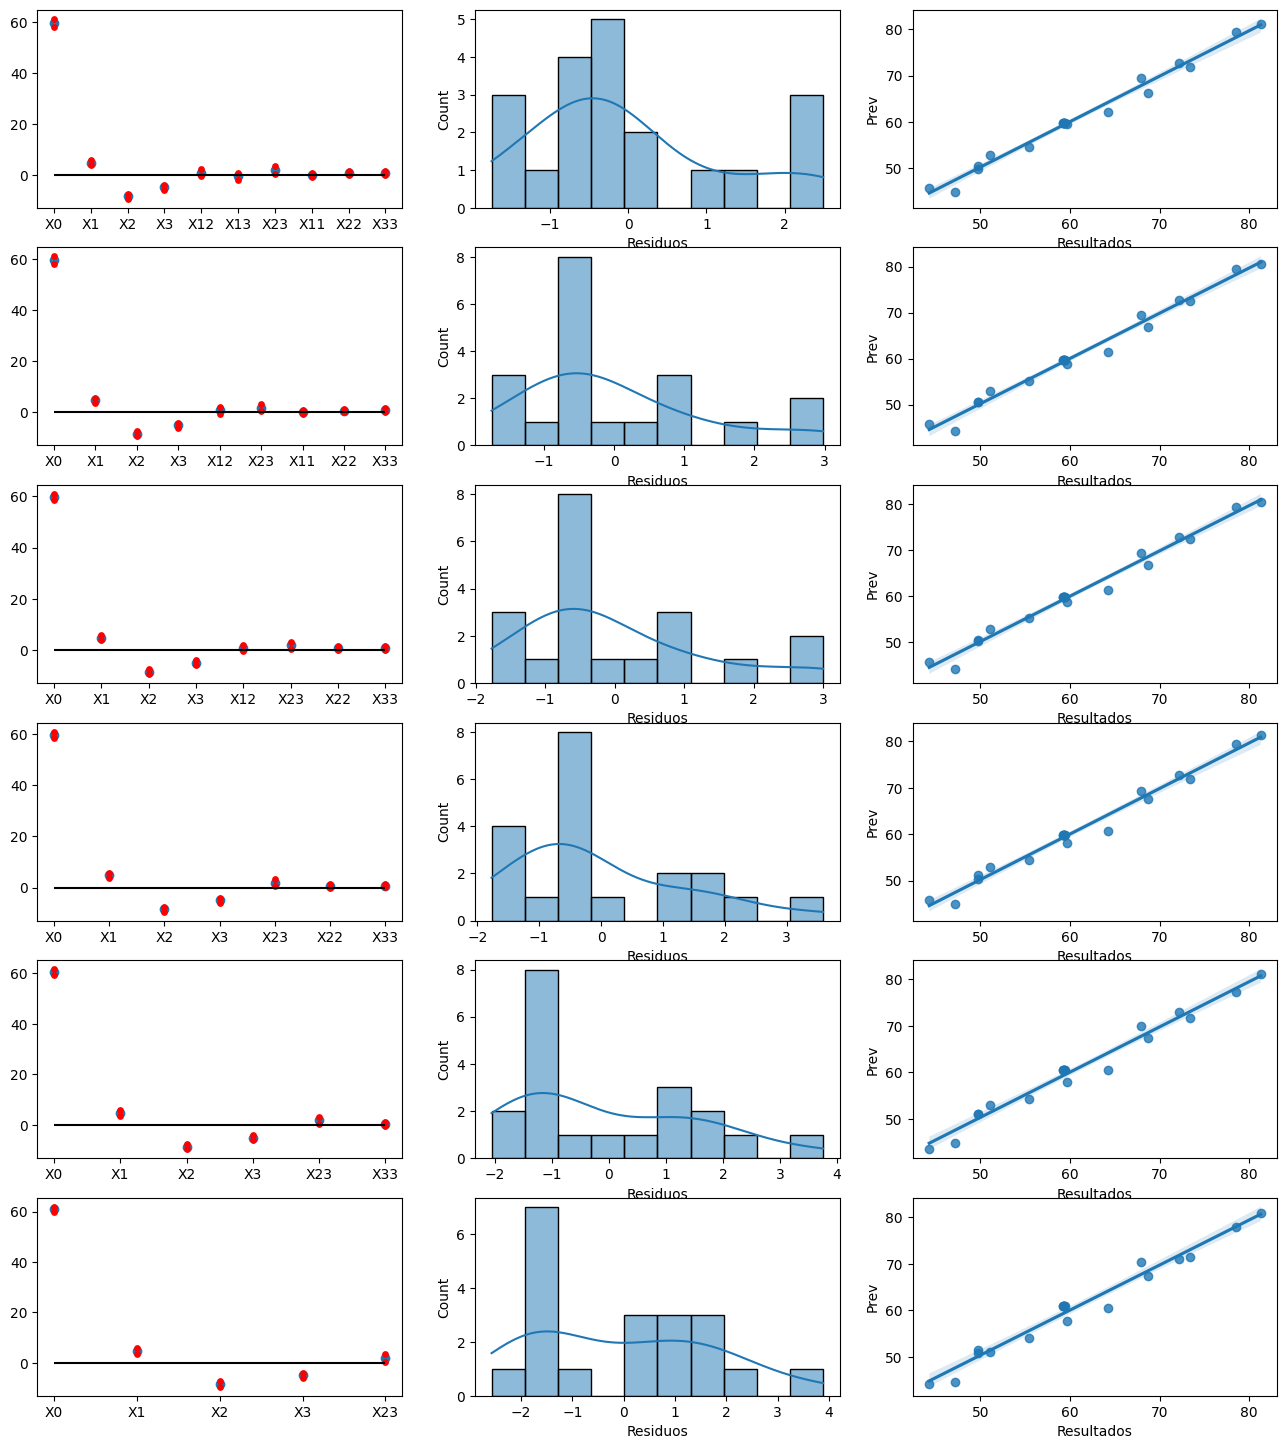

In [5]:
# Cálculo do modelo de regressão obtido para a primeira resposta através da função "superDoE"
# A função realiza sucessivol modelos de regressão, eliminando os coeficientes mais insignificantes para cada ciclo (coeficientes com intervalo de confiança que excedam seu próprio valor, 2 +/- 4 por exemplo)
# recebe a matriz posto e os resultados
# devolve uma lista com os coeficientes de regressão, os desvios padrões, os erros e os intervalos de confiança
df_x = df_x.astype(float)
reg, prev = d.super_DoE(df_x, df_y1)

In [6]:
# Coeficientes relevantes após a eliminação de todos os insignificantes através do teste t
# pela figura acima nota-se que os coeficientes mais relevantes foram X0, X1, X2, X3, e a interação X23

coefs = pd.DataFrame(reg[-1], columns = ["coef", "var", "err", "IC", "|coef| - |IC|"], index = ["X0", "X1", "X2", "X3", "X23"])
coefs

,coef,var,err,IC,|coef| - |IC|
X0,60.96000,0.207966,0.456033,0.978094,59.981906
X1,4.75625,0.259958,0.509861,1.093542,3.662708
X2,-8.43125,0.259958,0.509861,1.093542,7.337708
X3,-4.99375,0.259958,0.509861,1.093542,3.900208
X23,1.86250,0.519916,0.721052,1.546502,0.315998


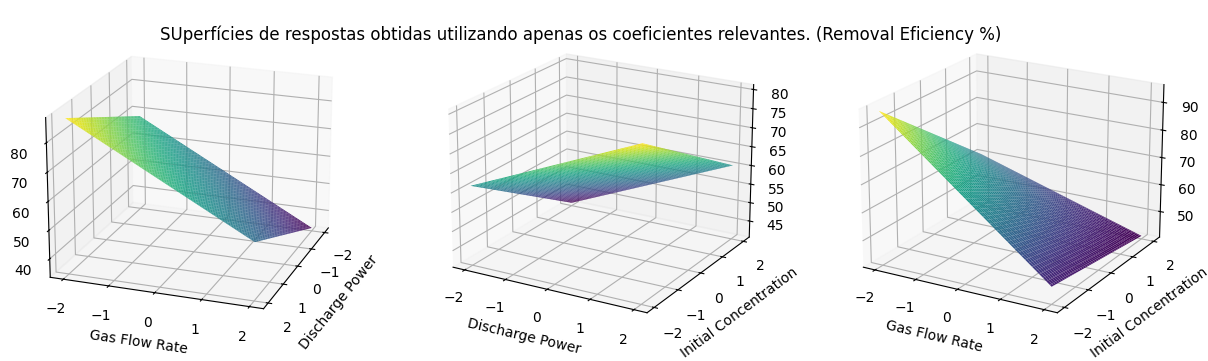

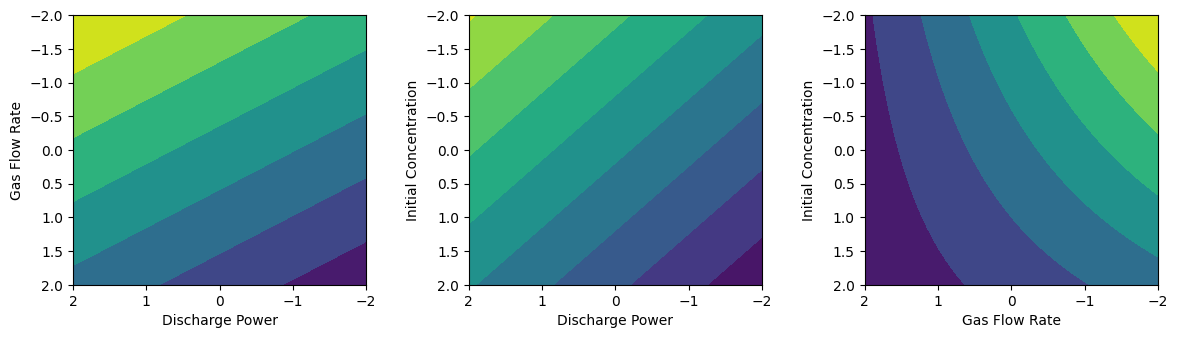

In [7]:
# plot das superfícies de resposta - consolidação do método RSM (Responde Surface Method)
# Considesando as duas ultimas variáveis:Gas Flow Rate e Initial Concentration. Os mínimos e máximos codificados são -2 e 2, respectivamente.
eixo_x = np.linspace(-2,2,100)
eixo_y = np.linspace(-2,2,100)
X, Y = np.meshgrid(eixo_x, eixo_y)

#superfície de resposta para Discharge Power X Flow Rate
sup12 = coefs.loc["X0", "coef"] + (coefs.loc["X1", "coef"]*X) + (coefs.loc["X2", "coef"]*Y)
#superfície de resposta para Discharge Power X Initical Concentration
sup13 = coefs.loc["X0", "coef"] + (coefs.loc["X1", "coef"]*X) + (coefs.loc["X3", "coef"]*Y)
#superfície de resposta para Flow Rate X Initial Concentration
sup23 = coefs.loc["X0", "coef"] + (coefs.loc["X2", "coef"]*X) + (coefs.loc["X3", "coef"]*Y) + (coefs.loc["X23", "coef"]*X*Y)

figura1, axis = plt.subplots(1,3, figsize = (15,10), subplot_kw={"projection": "3d"})
from matplotlib import colors

#superfícies de resposta
axis[0].plot_surface(X, Y, sup12, cmap = "viridis")
axis[0].view_init(elev = 20, azim = 20)
axis[0].set(xlabel = "Discharge Power", ylabel = "Gas Flow Rate" )

axis[1].plot_surface(X, Y, sup13, cmap = "viridis")
axis[1].view_init(elev = 20)
axis[1].set(xlabel = "Discharge Power", ylabel = "Initial Concentration" )

axis[2].plot_surface(X, Y, sup23, cmap = "viridis")
axis[2].view_init(elev = 20)
axis[2].set(xlabel = "Gas Flow Rate", ylabel = "Initial Concentration")

figura1.suptitle("SUperfícies de respostas obtidas utilizando apenas os coeficientes relevantes. (Removal Eficiency %)", y = 0.65)

#graficos de contorno
figura2, axes = plt.subplots(1,3, figsize = (14,3.5))
figura2.subplots_adjust(wspace = 0.35)

axes[0].contourf(X, Y, sup12, cmap = "viridis")
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].set(xlabel = "Discharge Power", ylabel = "Gas Flow Rate" )

axes[1].contourf(X, Y, sup13, cmap = "viridis")
axes[1].invert_xaxis()
axes[1].invert_yaxis()
axes[1].set(xlabel = "Discharge Power", ylabel = "Initial Concentration" )

axes[2].contourf(X, Y, sup23, cmap = "viridis")
axes[2].invert_xaxis()
axes[2].invert_yaxis()
axes[2].set(xlabel = "Gas Flow Rate", ylabel = "Initial Concentration")

plt.show()



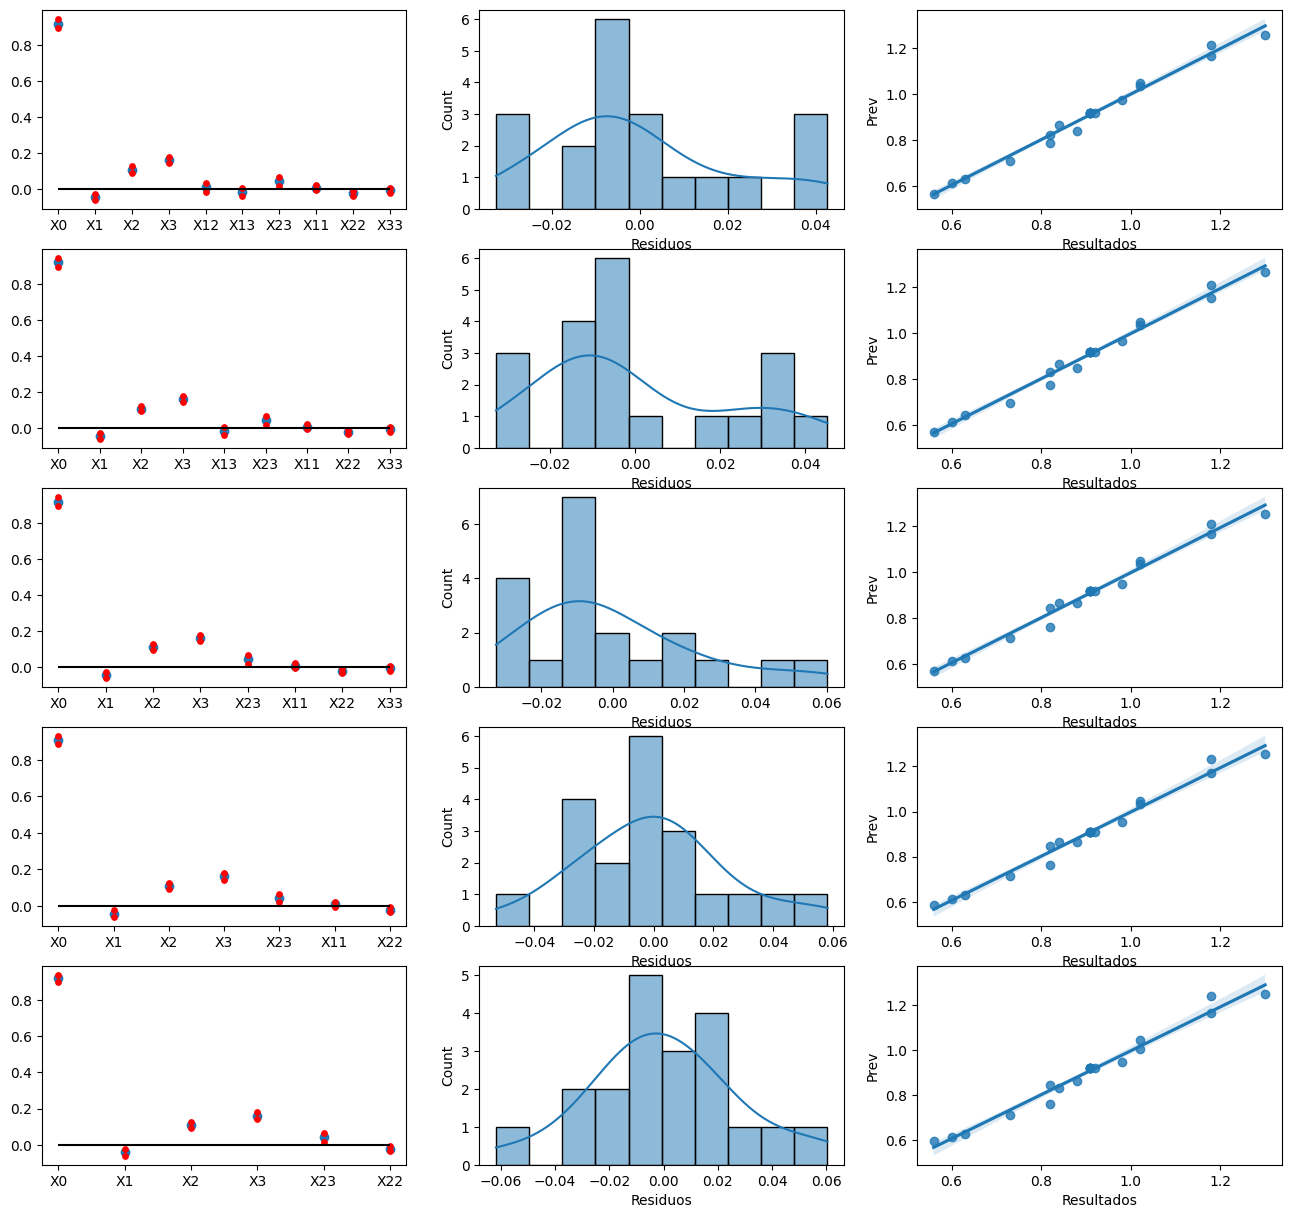

In [8]:
# Cálculo do modelo de regressão obtido para a primeira resposta através da função "superDoE"
reg1, prev1 = d.super_DoE(df_x, df_y2)

In [9]:
coef_y2 = pd.DataFrame(reg1[-1], index = ["X0", "X1", "X2", "X3", "X23", "X22"], columns = ["coef", "var", "err", "IC", "|coef| - |IC|"] )
coef_y2

,coef,var,err,IC,|coef| - |IC|
X0,0.919265,0.000079,0.008889,0.019202,0.900062
X1,-0.042500,0.000067,0.008195,0.017704,0.024796
X2,0.108750,0.000067,0.008195,0.017704,0.091046
X3,0.161250,0.000067,0.008195,0.017704,0.143546
X23,0.042500,0.000134,0.011589,0.025037,0.017463
X22,-0.022206,0.000040,0.006285,0.013578,0.008628


[Text(0.5, 0, 'Gas Flow Rate'), Text(0, 0.5, 'Initial Concentration')]

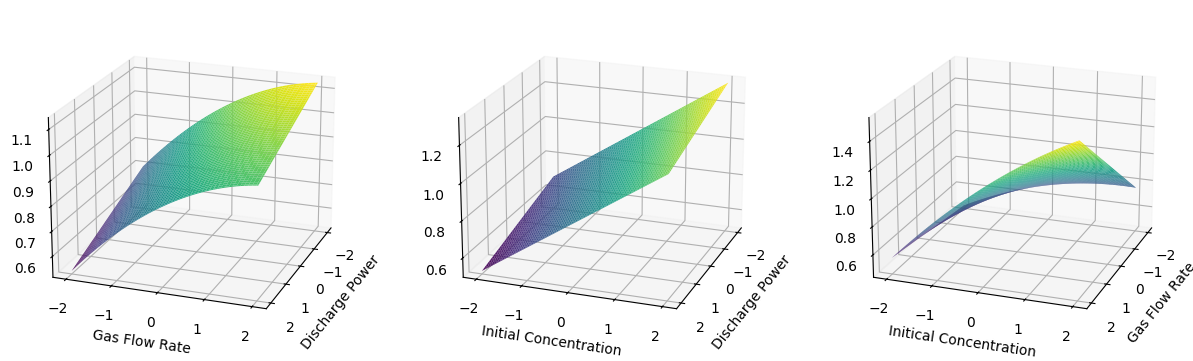

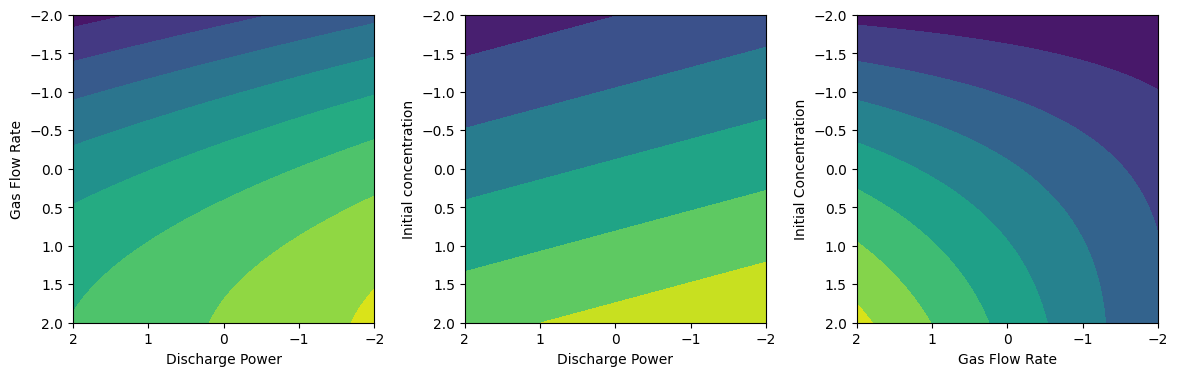

In [10]:
# plot das superfícies de resposta e dos gráficos de contorno obtidos ( Energy efiency (g kWh-¹))

# para a segunda resposta analizada os autores usaram o mesmos mesmos experimentos, mudaram apenas a resposta analizada
# logo os mesmo níveis codificados podem ser usados para as matrizes X e Y
X = np.linspace(-2,2,100)
Y = np.linspace(-2,2,100)

x_s, y_s = np.meshgrid(X, Y)

sup12 = coef_y2.loc["X0","coef"] + (coef_y2.loc["X1","coef"]*x_s) + (coef_y2.loc["X2","coef"]*y_s) + (coef_y2.loc["X22","coef"]*y_s*y_s)
sup13 = coef_y2.loc["X0","coef"] + (coef_y2.loc["X1","coef"]*x_s) + (coef_y2.loc["X3","coef"]*y_s)
sup23 = coef_y2.loc["X0","coef"] + (coef_y2.loc["X2","coef"]*x_s) + (coef_y2.loc["X3","coef"]*y_s) + (coef_y2.loc["X23","coef"]*x_s*y_s) + (coef_y2.loc["X22","coef"]*y_s*y_s)

#plot das superfícies de resposta
figura3, axis1 = plt.subplots(1,3, figsize = (15,6), subplot_kw = {"projection": "3d"})

axis1[0].plot_surface(x_s, y_s, sup12, cmap = "viridis")
axis1[0].view_init(elev = 20, azim = 20)
axis1[0].set(xlabel = "Discharge Power", ylabel = "Gas Flow Rate" )

axis1[1].plot_surface(x_s, y_s, sup13, cmap = "viridis")
axis1[1].view_init(elev = 20, azim = 20)
axis1[1].set(xlabel = "Discharge Power", ylabel = "Initial Concentration" )

axis1[2].plot_surface(x_s, y_s, sup23, cmap = "viridis")
axis1[2].view_init(elev = 20, azim = 20)
axis1[2].set(xlabel = "Gas Flow Rate", ylabel = "Initical Concentration" )

# Plot dos gráficos de contorno
figura4, axis2 = plt.subplots(1,3, figsize = (14,4))
figura4.subplots_adjust(wspace = 0.3)

axis2[0].contourf(x_s, y_s, sup12)
axis2[0].invert_xaxis()
axis2[0].invert_yaxis()
axis2[0].set(xlabel = "Discharge Power", ylabel = "Gas Flow Rate" )

axis2[1].contourf(x_s, y_s, sup13)
axis2[1].invert_xaxis()
axis2[1].invert_yaxis()
axis2[1].set(xlabel = "Discharge Power", ylabel = "Initial concentration" )

axis2[2].contourf(x_s, y_s, sup23)
axis2[2].invert_xaxis()
axis2[2].invert_yaxis()
axis2[2].set(xlabel = "Gas Flow Rate", ylabel = "Initial Concentration" )

As superfícies de resposta expostas acima são considerados apenas os coeficientes de regressão significantes, porém os autores utilizaram todos os coeficientes obtidos para os cálculos das superfícies de resposta expostas no paper


In [11]:
coefs_y1 = pd.DataFrame(reg[0], index = ["X0", "X1", "X2", "X3", "X12", "X13", "X23", "X11", "X22", "X33"], columns = ["coef", "var", "err", "IC", "|coef| - |IC|"] )
coefs_y2 = pd.DataFrame(reg1[0], index = ["X0", "X1", "X2", "X3", "X12", "X13", "X23", "X11", "X22", "X33"], columns = ["coef", "var", "err", "IC", "|coef| - |IC|"])
coefs_y1

,coef,var,err,IC,|coef| - |IC|
X0,59.695455,0.475775,0.689764,1.560355,58.135099
X1,4.756250,0.186912,0.432333,0.978005,3.778245
X2,-8.431250,0.186912,0.432333,0.978005,7.453245
X3,-4.993750,0.186912,0.432333,0.978005,4.015745
X12,0.737500,0.373823,0.611411,1.383107,-0.645607
X13,-0.662500,0.373823,0.611411,1.383107,-0.720607
X23,1.862500,0.373823,0.611411,1.383107,0.479393
X11,0.072727,0.118944,0.344882,0.780178,-0.707450
X22,0.722727,0.118944,0.344882,0.780178,-0.057450
X33,0.785227,0.118944,0.344882,0.780178,0.005050


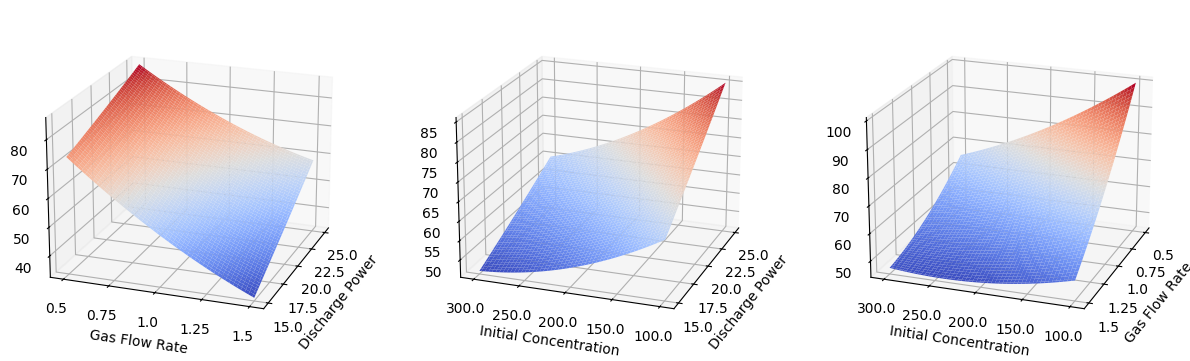

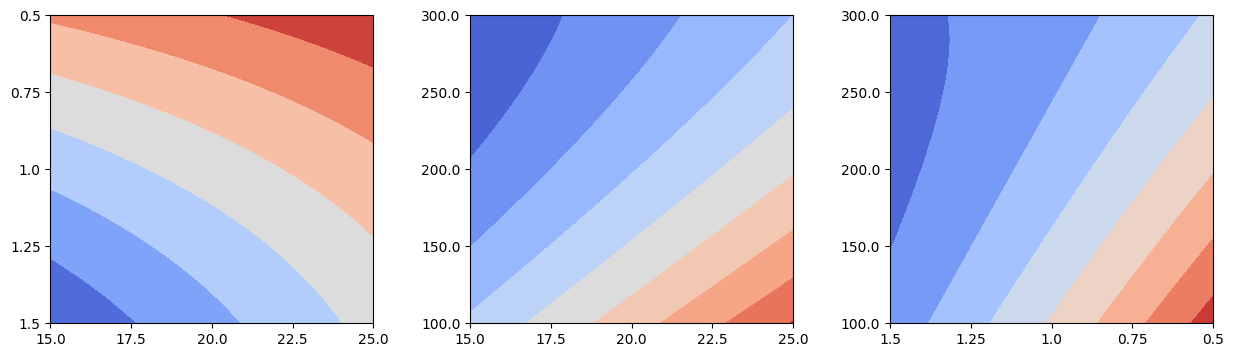

In [15]:
x_list = np.linspace(-2, 2, 100)
y_list = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x_list, y_list)

# cálculo da superfície de resposta e gráfico de contorno para a primeira resposta (Removal Eficiency %)
supy112 = coefs_y1.loc["X0", "coef"] + (coefs_y1.loc["X1", "coef"]*X) + (coefs_y1.loc["X2", "coef"]*Y) + (coefs_y1.loc["X12", "coef"]*X*Y) + (coefs_y1.loc["X11", "coef"]*X*X) + (coefs_y1.loc["X22", "coef"]*Y*Y)
supy113 = coefs_y1.loc["X0", "coef"] + (coefs_y1.loc["X1", "coef"]*X) + (coefs_y1.loc["X3", "coef"]*Y) + (coefs_y1.loc["X13", "coef"]*X*Y) + (coefs_y1.loc["X11", "coef"]*X*X) + (coefs_y1.loc["X33", "coef"]*Y*Y)
supy123 = coefs_y1.loc["X0", "coef"] + (coefs_y1.loc["X2", "coef"]*X) + (coefs_y1.loc["X3", "coef"]*Y) + (coefs_y1.loc["X23", "coef"]*X*Y) + (coefs_y1.loc["X22", "coef"]*X*X) + (coefs_y1.loc["X33", "coef"]*Y*Y)

# plot das superfícies de resposta
figura5, axis = plt.subplots(1, 3, figsize = (15,5), subplot_kw = {"projection": "3d"})

axis[0].plot_surface(X, Y, supy112, cmap = "coolwarm")
axis[0].view_init(elev = 20, azim = 20)
axis[0].set(xlabel = "Discharge Power", ylabel = "Gas Flow Rate" )
axis[0].set_xticks(np.linspace(-2,2,5))
axis[0].set_xticklabels(np.linspace(15,25,5))
axis[0].set_yticks(np.linspace(-2,2,5))
axis[0].set_yticklabels(np.linspace(0.5,1.5,5))
axis[0]. invert_xaxis()

axis[1].plot_surface(X, Y, supy113, cmap = "coolwarm")
axis[1].view_init(elev = 20, azim = 20)
axis[1].set(xlabel = "Discharge Power", ylabel = "Initial Concentration" )
axis[1].set_xticks(np.linspace(-2,2,5))
axis[1].set_xticklabels(np.linspace(15,25,5))
axis[1].set_yticks(np.linspace(-2,2,5))
axis[1].set_yticklabels(np.linspace(100,300,5))
axis[1]. invert_xaxis()
axis[1]. invert_yaxis()

axis[2].plot_surface(X, Y, supy123, cmap = "coolwarm")
axis[2].view_init(elev = 20, azim = 20)
axis[2].set(xlabel = "Gas Flow Rate", ylabel = "Initial Concentration" )
axis[2].set_xticks(np.linspace(-2,2,5))
axis[2].set_xticklabels(np.linspace(0.5,1.5,5))
axis[2].set_yticks(np.linspace(-2,2,5))
axis[2].set_yticklabels(np.linspace(100,300,5))
axis[2]. invert_yaxis()

# plot dos gráficos de contorno
figura6, axis = plt.subplots(1,3,figsize = (15,4))
figura6.subplots_adjust(wspace = 0.3)

axis[0].contourf(X, Y, supy112, cmap = "coolwarm")
axis[0].set_xticks(np.linspace(-2,2,5))
axis[0].set_xticklabels(np.linspace(15,25,5))
axis[0].set_yticks(np.linspace(-2,2,5))
axis[0].set_yticklabels(np.linspace(0.5,1.5,5))
axis[0]. invert_yaxis()

axis[1].contourf(X, Y, supy113, cmap = "coolwarm")
axis[1].set_xticks(np.linspace(-2,2,5))
axis[1].set_xticklabels(np.linspace(15,25,5))
axis[1].set_yticks(np.linspace(-2,2,5))
axis[1].set_yticklabels(np.linspace(100,300,5))

axis[2].contourf(X, Y, supy123, cmap = "coolwarm")
axis[2].set_xticks(np.linspace(-2,2,5))
axis[2].set_xticklabels(np.linspace(0.5,1.5,5))
axis[2].set_yticks(np.linspace(-2,2,5))
axis[2].set_yticklabels(np.linspace(100,300,5))
axis[2]. invert_xaxis()

plt.show()

In [41]:
# avaliação da melhor condição experimental, aquela que entrega a maior resposta, para a primeira resposta avaliada (Removal Eficiency %)

# importação da função minimize da biblioteca numpy (encontra o mpinimo de uma função)
from scipy.optimize import minimize

# definição dos coeficietes de regressão
b0 = coefs_y1.iloc[0,0]
b1 = coefs_y1.iloc[1,0]
b2 = coefs_y1.iloc[2,0]
b3 = coefs_y1.iloc[3,0]
b12 = coefs_y1.iloc[4,0]
b13 = coefs_y1.iloc[5,0]
b23 = coefs_y1.iloc[6,0]
b11 = coefs_y1.iloc[7,0]
b22 = coefs_y1.iloc[8,0]
b33 = coefs_y1.iloc[9,0]

# função do polinômio, recebe como entrada um vetor com 3 parâmetros (x1, x2 e x3) e devolve o valor obtido no ponto especificado "modelo"
def rsm(x):
  x1, x2, x3 = x
  modelo = b0 + b1*x1 + b2*x2 + b3*x3 + b12*x1*x2 + b13*x1*x3 + b23*x2*x3 + b11*x1*x1 + b22*x2*x2 + b33*x3*x3
  return(modelo)

# definição do domínio experimental, como a matriz posto foi realizada com as variáveis codificadas, o dompinio experimental deve ser definido com variáveis codificadas também
dominio = ((-2,2), (-2,2), (-2,2))

# minimize é uma função que encontra os valores do vetor x onde a resposta "modelo" encontre o mpinimo. Como queremos o máximo, utilizamos a função temporária "lambda x: -rsm(x)"
# res é um objeto do numpy que contem x(o vetor x com as variáveis codificadas no nível ótimo)
res = minimize(lambda x: -rsm(x), [0,0,0], bounds = dominio, method = 'L-BFGS-B')

print(f"""====================================================================\n
A melhor 'Removal Eficiency %' será obtida quando:\n
--->Discharge power: em nivel codificado {res.x[0]} - em nível real {15+(res.x[0]*5)}W\n
--->Gas Flow Rate: em nível codificado {res.x[1]} - em nível real {1+(res.x[1]*0.25)}L/min\n
--->Initial Concentration: em nível codificado {res.x[2]} - em nível real {200+(res.x[2]*50)}ppm\n
======================================================================""")


A melhor 'Removal Eficiency %' será obtida quando:

--->Discharge power: em nivel codificado 2.0 - em nível real 25.0W

--->Gas Flow Rate: em nível codificado -2.0 - em nível real 0.5L/min

--->Initial Concentration: em nível codificado -2.0 - em nível real 100.0ppm



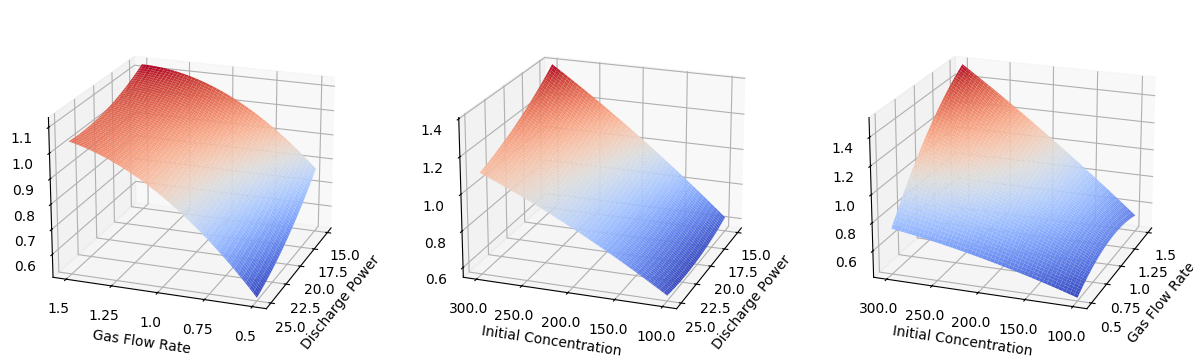

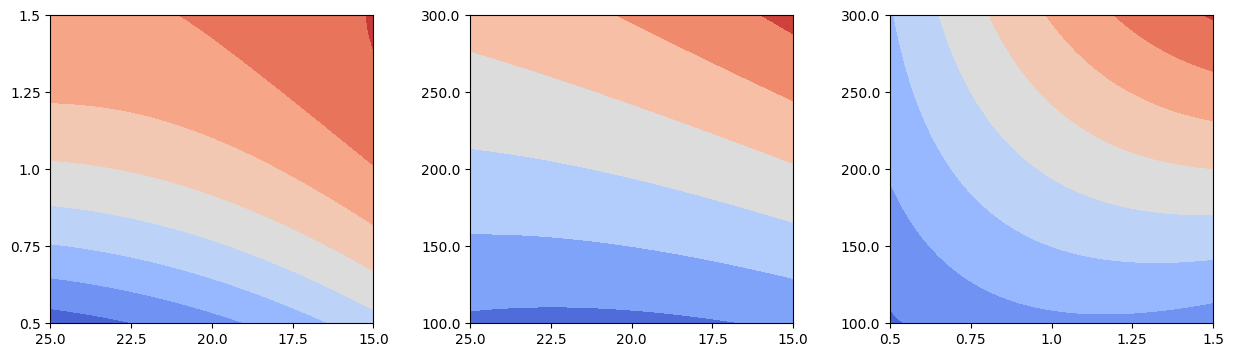

In [14]:
x_list = np.linspace(-2, 2, 100)
y_list = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x_list, y_list)

# cálculo da superfície de resposta e gráfico de contorno para a segundaresposta (Energy efiency (g kWh-¹))
supy212 = coefs_y2.loc["X0", "coef"] + (coefs_y2.loc["X1", "coef"]*X) + (coefs_y2.loc["X2", "coef"]*Y) + (coefs_y2.loc["X12", "coef"]*X*Y) + (coefs_y2.loc["X11", "coef"]*X*X) + (coefs_y2.loc["X22", "coef"]*Y*Y)
supy213 = coefs_y2.loc["X0", "coef"] + (coefs_y2.loc["X1", "coef"]*X) + (coefs_y2.loc["X3", "coef"]*Y) + (coefs_y2.loc["X13", "coef"]*X*Y) + (coefs_y2.loc["X11", "coef"]*X*X) + (coefs_y2.loc["X33", "coef"]*Y*Y)
supy223 = coefs_y2.loc["X0", "coef"] + (coefs_y2.loc["X2", "coef"]*X) + (coefs_y2.loc["X3", "coef"]*Y) + (coefs_y2.loc["X23", "coef"]*X*Y) + (coefs_y2.loc["X22", "coef"]*X*X) + (coefs_y2.loc["X33", "coef"]*Y*Y)

# plot das superfícies de resposta
figura6, axis = plt.subplots(1, 3, figsize = (15,5), subplot_kw = {"projection": "3d"})

axis[0].plot_surface(X, Y, supy212, cmap = "coolwarm")
axis[0].view_init(elev = 20, azim = 20)
axis[0].set(xlabel = "Discharge Power", ylabel = "Gas Flow Rate" )
axis[0].set_xticks(np.linspace(-2,2,5))
axis[0].set_xticklabels(np.linspace(15,25,5))
axis[0].set_yticks(np.linspace(-2,2,5))
axis[0].set_yticklabels(np.linspace(0.5,1.5,5))
axis[0]. invert_yaxis()

axis[1].plot_surface(X, Y, supy213, cmap = "coolwarm")
axis[1].view_init(elev = 20, azim = 20)
axis[1].set(xlabel = "Discharge Power", ylabel = "Initial Concentration" )
axis[1].set_xticks(np.linspace(-2,2,5))
axis[1].set_xticklabels(np.linspace(15,25,5))
axis[1].set_yticks(np.linspace(-2,2,5))
axis[1].set_yticklabels(np.linspace(100,300,5))
axis[1]. invert_yaxis()

axis[2].plot_surface(X, Y, supy223, cmap = "coolwarm")
axis[2].view_init(elev = 20, azim = 20)
axis[2].set(xlabel = "Gas Flow Rate", ylabel = "Initial Concentration" )
axis[2].set_xticks(np.linspace(-2,2,5))
axis[2].set_xticklabels(np.linspace(0.5,1.5,5))
axis[2].set_yticks(np.linspace(-2,2,5))
axis[2].set_yticklabels(np.linspace(100,300,5))
axis[2]. invert_xaxis()
axis[2]. invert_yaxis()

# plot dos gráficos de contorno
figura6, axis = plt.subplots(1,3,figsize = (15,4))
figura6.subplots_adjust(wspace = 0.3)

axis[0].contourf(X, Y, supy212, cmap = "coolwarm")
axis[0].set_xticks(np.linspace(-2,2,5))
axis[0].set_xticklabels(np.linspace(15,25,5))
axis[0].set_yticks(np.linspace(-2,2,5))
axis[0].set_yticklabels(np.linspace(0.5,1.5,5))
axis[0]. invert_xaxis()

axis[1].contourf(X, Y, supy213, cmap = "coolwarm")
axis[1].set_xticks(np.linspace(-2,2,5))
axis[1].set_xticklabels(np.linspace(15,25,5))
axis[1].set_yticks(np.linspace(-2,2,5))
axis[1].set_yticklabels(np.linspace(100,300,5))
axis[1]. invert_xaxis()

axis[2].contourf(X, Y, supy223, cmap = "coolwarm")
axis[2].set_xticks(np.linspace(-2,2,5))
axis[2].set_xticklabels(np.linspace(0.5,1.5,5))
axis[2].set_yticks(np.linspace(-2,2,5))
axis[2].set_yticklabels(np.linspace(100,300,5))

plt.show()

In [44]:
# avaliação da melhor condição experimental, aquela que entrega a maior resposta, para a segunda resposta avaliada (Removal Eficiency %)


b0 = coefs_y2.iloc[0,0]
b1 = coefs_y2.iloc[1,0]
b2 = coefs_y2.iloc[2,0]
b3 = coefs_y2.iloc[3,0]
b12 = coefs_y2.iloc[4,0]
b13 = coefs_y2.iloc[5,0]
b23 = coefs_y2.iloc[6,0]
b11 = coefs_y2.iloc[7,0]
b22 = coefs_y2.iloc[8,0]
b33 = coefs_y2.iloc[9,0]

res2 = minimize(lambda x: -rsm(x), [0,0,0], bounds = dominio, method = 'L-BFGS-B')

print(f"""====================================================================\n
A melhor 'Energy efiency (g kWh-¹)' será obtida quando:\n
--->Discharge power: em nivel codificado {res2.x[0]} - em nível real {15+(res2.x[0]*5)}W\n
--->Gas Flow Rate: em nível codificado {res2.x[1]} - em nível real {1+(res2.x[1]*0.25)}L/min\n
--->Initial Concentration: em nível codificado {res2.x[2]} - em nível real {200+(res2.x[2]*50)}ppm\n
======================================================================""")


A melhor 'Energy efiency (g kWh-¹)' será obtida quando:

--->Discharge power: em nivel codificado -2.0 - em nível real 5.0W

--->Gas Flow Rate: em nível codificado 2.0 - em nível real 1.5L/min

--->Initial Concentration: em nível codificado 2.0 - em nível real 300.0ppm

